In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')

job = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_job.csv')
resume = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_resume.csv')

In [462]:
pd.set_option('max_colwidth', 800)

In [463]:
resume.head()

,Category,cleaned_resume,LabelEncoding
0,Data Science,skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 2...,6
1,Data Science,education details may 2013 to may 2017 be uitrgpv data scientist data scientist matelabs skill details python exprience less than 1 year months statsmodels exprience 12 months aws exprience less than 1 year months machine learning exprience less than 1 year months sklearn exprience less than 1 year months scipy exprience less than 1 year months keras exprience less than 1 year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regre...,6
2,Data Science,areas of interest deep learning control system design programming inpython electric machinery web development analytics technical activities q hindustan aeronautics limited bangalore for 4 weeks under the guidance of mr satish senior engineer in the hangar of mirage 2000 fighter aircraft technical skills programming matlab python and java labview python webframeworkdjango flask ltspiceintermediate languages and and mipowerintermediate github gitbash jupyter notebook xampp mysqlbasics python software packages interpretersanaconda python2 python3 pycharm java ideeclipse operating systems windows ubuntu debiankali linux education details january 2019 btech electrical and electronics engineering manipal institute of technology january 2015 deeksha center january 2013 little flower public s...,6
3,Data Science,skills r python sap hana tableau sap hana sql sap hana pal ms sql sap lumira c linear programming data modelling advance analytics scm analytics retail analytics social media analytics nlp education details january 2017 to january 2018 pgdm business analytics great lakes institute of management illinois institute of technology january 2013 bachelor of engineering electronics and communication bengaluru karnataka new horizon college of engineering bangalore visvesvaraya technological university data science consultant consultant deloitte usi skill details linear programming exprience 6 months retail exprience 6 months retail marketing exprience 6 months scm exprience 6 months sql exprience less than 1 year months deep learning exprience less than 1 year months machine learning exprience...,6
4,Data Science,education details mca ymcaust faridabad haryana data science internship skill details data structure exprience less than 1 year months c exprience less than 1 year months data analysis exprience less than 1 year months python exprience less than 1 year months core java exprience less than 1 year months database management exprience less than 1 year monthscompany details company itechpower description,6


In [464]:
job.head()

,Job_title,cleaned_job,LabelEncoding
0,Flutter Developer,we are looking for hire experts flutter developer so you are eligible this post then apply your resume job types fulltime parttime salary 2000000 4000000 per month benefits flexible schedule food allowance schedule day shift supplemental pay joining bonus overtime pay experience total work 1 year preferred housing rent subsidy yes industry software development work remotely temporarily due to covid19,4
1,Django Developer,pythondjango developerlead job codepdj 04 strong python experience in api development restrpc experience working with api frameworks djangoflask experience evaluating and improving the efficiency of programs in a linux environment ability to effectively handle multiple tasks with a high level of accuracy and attention to detail good verbal and written communication skills working knowledge of sql json experience preferred good knowledge in automated unit testing using pyunit,3
2,Machine Learning,data scientist contractor bangalore in responsibilities we are looking for a capable data scientist to join the analytics team reporting locally in india bangalore this persons responsibilities include research design and development of machine learning and deep learning algorithms to tackle a variety of fraud oriented challenges the data scientist will work closely with software engineers and program managers to deliver endtoend products including data collection in big scale and analysis exploring different algorithmic approaches model development assessment and validation all the way through production qualifications at least 3 years of handson development of complex machine learning models using modern frameworks and tools ideally python based solid understanding of statistics and ...,8
3,iOS Developer,job description strong framework outside of ios is always a plus ios experience and generalist engineers with backgrounds in related technologies is a plus a disciplined approach to development documentation and file structure strong visual design sense and excellent taste a constant desire to improve learn more and take things higher an excellent understanding of networking mobile network issues concurrency and threading experience working with internationalized apps responsibilities design and build advanced applications for the ios platform collaborate with crossfunctional teams to define design and ship new features work on bug fixing and improving application performance continuously discover evaluate and implement new technologies to maximize development efficiency have published...,14
4,Full Stack Developer,job responsibility full stack engineer react role make impact petsmart transforming engineering team meet need rapidly changing retail environment role foundational helping build craft petsmart prowess making react j native key framework across mobile web property working across web mobile application part building amazing mobile first customer experience impact customer store digital channel goal responsibility include act full stack developer across petsmart various web mobile solution full stack engineer help build petsmart competency using react j native across mobile web property partner web engineering team strategy share component across application best practice new advancement react community work product ux team review design concept offer suggestion decrease complexity maint...,5


### Resume

In [465]:
import nltk
#nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
len(stopwords.words('english'))

179

In [466]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: word_tokenize(x))

In [467]:
resume.head()

,Category,cleaned_resume,LabelEncoding
0,Data Science,"[skills, programming, languages, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, nave, bayes, knn, random, forest, decision, trees, boosting, techniques, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, nets, database, visualizations, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, and, understanding, of, deep, learningeducation, details, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp...",6
1,Data Science,"[education, details, may, 2013, to, may, 2017, be, uitrgpv, data, scientist, data, scientist, matelabs, skill, details, python, exprience, less, than, 1, year, months, statsmodels, exprience, 12, months, aws, exprience, less, than, 1, year, months, machine, learning, exprience, less, than, 1, year, months, sklearn, exprience, less, than, 1, year, months, scipy, exprience, less, than, 1, year, months, keras, exprience, less, than, 1, year, monthscompany, details, company, matelabs, description, ml, platform, for, business, professionals, dummies, and, enthusiasts, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, and, deployed, auto, preprocessing, steps, of, machine, learning, mainly, missing, value, treatment, outlier, detection, ...]",6
2,Data Science,"[areas, of, interest, deep, learning, control, system, design, programming, inpython, electric, machinery, web, development, analytics, technical, activities, q, hindustan, aeronautics, limited, bangalore, for, 4, weeks, under, the, guidance, of, mr, satish, senior, engineer, in, the, hangar, of, mirage, 2000, fighter, aircraft, technical, skills, programming, matlab, python, and, java, labview, python, webframeworkdjango, flask, ltspiceintermediate, languages, and, and, mipowerintermediate, github, gitbash, jupyter, notebook, xampp, mysqlbasics, python, software, packages, interpretersanaconda, python2, python3, pycharm, java, ideeclipse, operating, systems, windows, ubuntu, debiankali, linux, education, details, january, 2019, btech, electrical, and, electronics, engineering, manipal...",6
3,Data Science,"[skills, r, python, sap, hana, tableau, sap, hana, sql, sap, hana, pal, ms, sql, sap, lumira, c, linear, programming, data, modelling, advance, analytics, scm, analytics, retail, analytics, social, media, analytics, nlp, education, details, january, 2017, to, january, 2018, pgdm, business, analytics, great, lakes, institute, of, management, illinois, institute, of, technology, january, 2013, bachelor, of, engineering, electronics, and, communication, bengaluru, karnataka, new, horizon, college, of, engineering, bangalore, visvesvaraya, technological, university, data, science, consultant, consultant, deloitte, usi, skill, details, linear, programming, exprience, 6, months, retail, exprience, 6, months, retail, marketing, exprience, 6, months, scm, exprience, 6, months, sql, exprience, ...",6
4,Data Science,"[education, details, mca, ymcaust, faridabad, haryana, data, science, internship, skill, details, data, structure, exprience, less, than, 1, year, months, c, exprience, less, than, 1, year, months, data, analysis, exprience, less, than, 1, year, months, python, exprience, less, than, 1, year, months, core, java, exprience, less, than, 1, year, months, database, management, exprience, less, than, 1, year, monthscompany, details, company, itechpower, description]",6


In [468]:
DOMAIN_SPECIFIC_STOPWORDS = ['resume', 'job', 'candidate', 'apply', 'experience', 'skills']
stop_words = set(stopwords.words('english')).union(DOMAIN_SPECIFIC_STOPWORDS)

def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [469]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'apply',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'candidate',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'experience',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'job',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ou

In [500]:
len(stop_words)

185

In [470]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: remove_stopwords_from_tokens(x))

In [471]:
resume.head()

,Category,cleaned_resume,LabelEncoding
0,Data Science,"[programming, languages, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, nave, bayes, knn, random, forest, decision, trees, boosting, techniques, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, nets, database, visualizations, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understanding, deep, learningeducation, details, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp, skill, details,...",6
1,Data Science,"[education, details, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, details, python, exprience, less, 1, year, months, statsmodels, exprience, 12, months, aws, exprience, less, 1, year, months, machine, learning, exprience, less, 1, year, months, sklearn, exprience, less, 1, year, months, scipy, exprience, less, 1, year, months, keras, exprience, less, 1, year, monthscompany, details, company, matelabs, description, ml, platform, business, professionals, dummies, enthusiasts, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, deployed, auto, preprocessing, steps, machine, learning, mainly, missing, value, treatment, outlier, detection, encoding, scaling, feature, selection, dimensionality, reduction, dep...",6
2,Data Science,"[areas, interest, deep, learning, control, system, design, programming, inpython, electric, machinery, web, development, analytics, technical, activities, q, hindustan, aeronautics, limited, bangalore, 4, weeks, guidance, mr, satish, senior, engineer, hangar, mirage, 2000, fighter, aircraft, technical, programming, matlab, python, java, labview, python, webframeworkdjango, flask, ltspiceintermediate, languages, mipowerintermediate, github, gitbash, jupyter, notebook, xampp, mysqlbasics, python, software, packages, interpretersanaconda, python2, python3, pycharm, java, ideeclipse, operating, systems, windows, ubuntu, debiankali, linux, education, details, january, 2019, btech, electrical, electronics, engineering, manipal, institute, technology, january, 2015, deeksha, center, january, ...",6
3,Data Science,"[r, python, sap, hana, tableau, sap, hana, sql, sap, hana, pal, ms, sql, sap, lumira, c, linear, programming, data, modelling, advance, analytics, scm, analytics, retail, analytics, social, media, analytics, nlp, education, details, january, 2017, january, 2018, pgdm, business, analytics, great, lakes, institute, management, illinois, institute, technology, january, 2013, bachelor, engineering, electronics, communication, bengaluru, karnataka, new, horizon, college, engineering, bangalore, visvesvaraya, technological, university, data, science, consultant, consultant, deloitte, usi, skill, details, linear, programming, exprience, 6, months, retail, exprience, 6, months, retail, marketing, exprience, 6, months, scm, exprience, 6, months, sql, exprience, less, 1, year, months, deep, lear...",6
4,Data Science,"[education, details, mca, ymcaust, faridabad, haryana, data, science, internship, skill, details, data, structure, exprience, less, 1, year, months, c, exprience, less, 1, year, months, data, analysis, exprience, less, 1, year, months, python, exprience, less, 1, year, months, core, java, exprience, less, 1, year, months, database, management, exprience, less, 1, year, monthscompany, details, company, itechpower, description]",6


In [472]:
# Lemmatise the tokens
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 10000000

def lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))

    return [token.lemma_ for token in doc]

In [473]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: lemmatize_tokens(x))

In [474]:
resume.head()

,Category,cleaned_resume,LabelEncoding
0,Data Science,"[programming, language, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learn, regression, svm, nave, baye, knn, random, forest, decision, tree, boost, technique, cluster, analysis, word, embed, sentiment, analysis, natural, language, process, dimensionality, reduction, topic, model, lda, nmf, pca, neural, net, database, visualization, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, other, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understand, deep, learningeducation, detail, datum, science, assurance, associate, datum, science, assurance, associate, ernst, young, llp, skill, detail, javascript, exprience, 24,...",6
1,Data Science,"[education, detail, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, detail, python, exprience, less, 1, year, month, statsmodels, exprience, 12, month, aw, exprience, less, 1, year, month, machine, learn, exprience, less, 1, year, month, sklearn, exprience, less, 1, year, month, scipy, exprience, less, 1, year, month, keras, exprience, less, 1, year, monthscompany, detail, company, matelab, description, ml, platform, business, professional, dummy, enthusiast, 60a, koramangala, 5th, block, achievementstask, behind, sukh, sagar, bengaluru, india, develop, deploy, auto, preprocessing, step, machine, learn, mainly, miss, value, treatment, outli, detection, encode, scale, feature, selection, dimensionality, reduction, deploy, automate, classification, regre...",6
2,Data Science,"[area, interest, deep, learn, control, system, design, programming, inpython, electric, machinery, web, development, analytic, technical, activity, q, hindustan, aeronautic, limit, bangalore, 4, week, guidance, mr, satish, senior, engineer, hangar, mirage, 2000, fighter, aircraft, technical, programming, matlab, python, java, labview, python, webframeworkdjango, flask, ltspiceintermediate, language, mipowerintermediate, github, gitbash, jupyter, notebook, xampp, mysqlbasics, python, software, package, interpretersanaconda, python2, python3, pycharm, java, ideeclipse, operating, system, windows, ubuntu, debiankali, linux, education, detail, january, 2019, btech, electrical, electronics, engineering, manipal, institute, technology, january, 2015, deeksha, center, january, 2013, little, f...",6
3,Data Science,"[r, python, sap, hana, tableau, sap, hana, sql, sap, hana, pal, ms, sql, sap, lumira, c, linear, programming, datum, model, advance, analytic, scm, analytic, retail, analytic, social, medium, analytic, nlp, education, detail, january, 2017, january, 2018, pgdm, business, analytic, great, lakes, institute, management, illinois, institute, technology, january, 2013, bachelor, engineering, electronic, communication, bengaluru, karnataka, new, horizon, college, engineering, bangalore, visvesvaraya, technological, university, datum, science, consultant, consultant, deloitte, usi, skill, detail, linear, programming, exprience, 6, month, retail, exprience, 6, month, retail, marketing, exprience, 6, month, scm, exprience, 6, month, sql, exprience, less, 1, year, month, deep, learn, exprience, ...",6
4,Data Science,"[education, detail, mca, ymcaust, faridabad, haryana, data, science, internship, skill, detail, datum, structure, exprience, less, 1, year, month, c, exprience, less, 1, year, month, data, analysis, exprience, less, 1, year, month, python, exprience, less, 1, year, month, core, java, exprience, less, 1, year, month, database, management, exprience, less, 1, year, monthscompany, detail, company, itechpower, description]",6


In [475]:
# from collections import Counter

# all_lemmas = []
# for resume_tokens in resume['cleaned_resume']:
#     all_lemmas.extend(resume_tokens)


# def visualize_word_distribution(tokens, n):
#     word_counts = Counter(tokens)

#     common_words = word_counts.most_common(n)
    
#     words, counts = zip(*common_words)
    
#     # Plot the bar chart
#     plt.figure(figsize=(25, 10))
#     plt.bar(words, counts, color='skyblue')
#     plt.xlabel("Words")
#     plt.ylabel("Frequency")
#     plt.title(f"Top {n} Most Common Lemmatized Words")
#     plt.xticks(rotation=45)
#     plt.show()

# visualize_word_distribution(all_lemmas, n=50)


In [ ]:
# word = Counter(all_lemmas)
# print(len(word))
# print(word)

39
Counter({' ': 308086, 'e': 246921, 't': 164486, 'a': 163813, 'i': 155766, 'n': 148596, 'r': 144683, 'o': 136695, 's': 112877, 'c': 100960, 'l': 95104, 'p': 80035, 'm': 72528, 'd': 62352, 'u': 58629, 'g': 39548, 'h': 35550, 'y': 34864, 'v': 29438, 'b': 24679, 'f': 22579, 'w': 17022, 'k': 16519, 'j': 10568, 'x': 9474, 'q': 7361, '1': 7224, '0': 6856, '2': 6505, '6': 2569, 'z': 2469, '3': 1919, '4': 1805, '5': 1563, '8': 1379, '7': 1348, '9': 1013, '+': 703, 'I': 63})


In [ ]:
# # Create a DataFrame from the Counter dictionary
# df = pd.DataFrame(word.items(), columns=['Word', 'Count'])

# # Generate descriptive statistics
# summary = df['Count'].describe()
# print(summary)

count        39.000000
mean      59860.230769
std       75040.166911
min          63.000000
25%        4537.000000
50%       24679.000000
75%       98032.000000
max      308086.000000
Name: Count, dtype: float64


In [ ]:
# # Find the row with the maximum count
# max_row = df[df['Count'] == df['Count'].max()]
# print("Most Frequent Word(s):")
# print(max_row)

# # Find the row with the minimum count
# min_row = df[df['Count'] == df['Count'].min()]
# print("\nLeast Frequent Word(s):")
# print(min_row)


Most Frequent Word(s):
  Word   Count
8       308086

Least Frequent Word(s):
   Word  Count
38    I     63


In [ ]:
# print("C++ in tokens:", 'c++' in all_lemmas)

C++ in tokens: False


In [ ]:
# print("Experience in tokens:", 'experience' in all_lemmas)

Experience in tokens: False


In [481]:
! pip install WordCloud

In [482]:
def join_tokens_to_string(tokens):
    return ' '.join(tokens)

resume['cleaned_resume'] = resume['cleaned_resume'].apply(join_tokens_to_string)

In [483]:
resume.head(2)

,Category,cleaned_resume,LabelEncoding
0,Data Science,programming language python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learn regression svm nave baye knn random forest decision tree boost technique cluster analysis word embed sentiment analysis natural language process dimensionality reduction topic model lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau other regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understand deep learningeducation detail datum science assurance associate datum science assurance associate ernst young llp skill detail javascript exprience 24 month jquery exprience 24 month python exprience 24 monthscompany detail company ernst young ...,6
1,Data Science,education detail may 2013 may 2017 uitrgpv data scientist data scientist matelabs skill detail python exprience less 1 year month statsmodels exprience 12 month aw exprience less 1 year month machine learn exprience less 1 year month sklearn exprience less 1 year month scipy exprience less 1 year month keras exprience less 1 year monthscompany detail company matelab description ml platform business professional dummy enthusiast 60a koramangala 5th block achievementstask behind sukh sagar bengaluru india develop deploy auto preprocessing step machine learn mainly miss value treatment outli detection encode scale feature selection dimensionality reduction deploy automate classification regression model linkedincominadityarathore b4600b146 reasearch deploy time series forecasting model ar...,6


In [484]:
# Join all resumes into a single large string for word cloud generation

resumes_text = ' '.join(resume['cleaned_resume'])

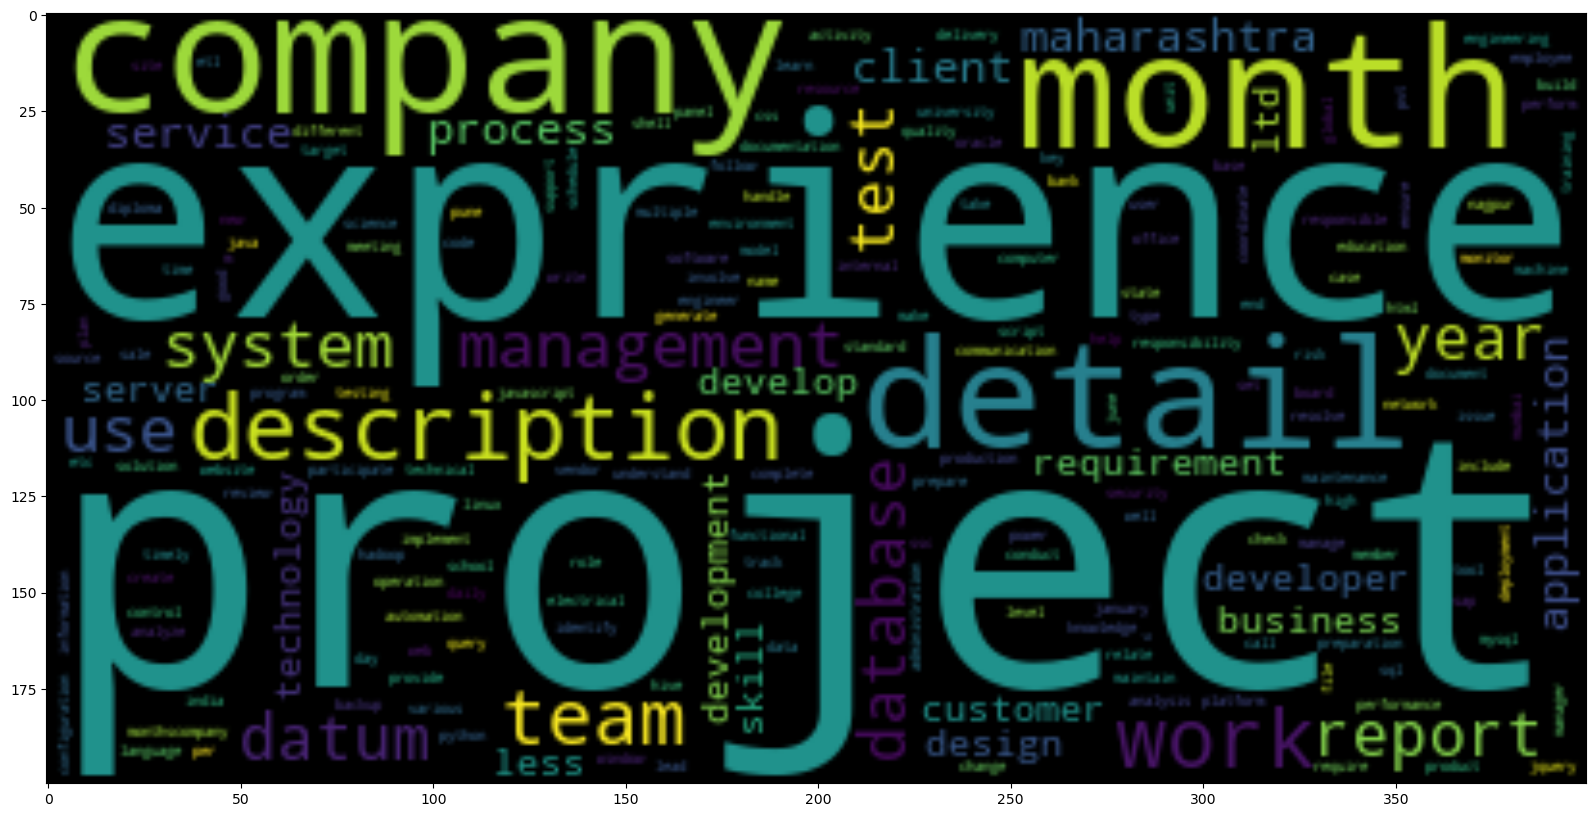

In [485]:
from wordcloud import WordCloud
wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,

collocation_threshold = 1
).generate(resumes_text)
plt.figure(figsize=(25, 10))
plt.imshow(wordcloudimage, interpolation='bilinear')
# plt.axis("off")
plt.show()

As we can see, we already remove the word 'experience' from our tokens but it still appear in the image. The reason is because it is incorrect spelling 'exprience'.

In [486]:
text ="modelling"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: modelling, Lemma: model


In [487]:
text ="visualisation"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: visualisation, Lemma: visualisation


### Job

#### Vectorise the words